In [204]:
from __future__ import division, print_function
from sympy import *
from sympy.plotting import plot3d

In [205]:
init_session()
%matplotlib inline

IPython console for SymPy 1.0 (Python 2.7.10-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [206]:
def u_fun(r, m):
    """ Trial function. """
    c = symbols('c0:%i' % m)
    #w = sum(c[k]*cos((2*k + 1)*pi/2*r) for k in range(0, m))
    w = (1 - r**2) *sum(c[k]*r**(2*k) for k in range(0, m))
    return w, c

In [207]:
r = symbols('r')
m = 4
u, coef = u_fun(r, m)

In [208]:
T_inte = u**2
U_inte = diff(u, r)**2

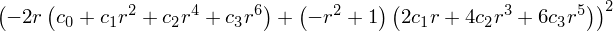

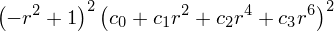

In [209]:
display(U_inte)
display(T_inte)

In [210]:
U = integrate(expand(r*U_inte), (r, 0, 1))
T = integrate(expand(r*T_inte), (r, 0, 1))

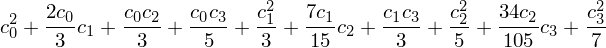

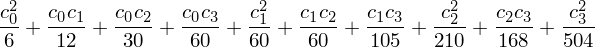

In [211]:
display(U)
display(T)

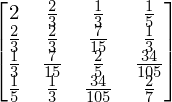

In [212]:
K = Matrix(m, m, lambda ii, jj: diff(U, coef[ii], coef[jj]))
K

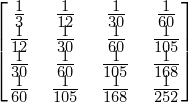

In [213]:
M = Matrix(m, m, lambda ii, jj: diff(T, coef[ii], coef[jj]))
M

In [214]:
Kn = np.array(K)
Mn = np.array(M)

In [218]:
import scipy.linalg as LA
from scipy.special import jn_zeros
vals, vecs = LA.eigh(Kn, Mn, eigvals=(0, m-1))
np.sqrt(vals)

array([  2.40482556,   5.52038927,   8.84484136,  16.41678707])

In [219]:
jn_zeros(0, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])